# OpenCV

- 실시간 컴퓨터 비전을 목적으로, 실시간 이미지 프로세싱에 중점을 둔 한 프로그래밍 라이브러리

- 인텔(Intel)에서 개발

- TensorFlow , Torch / PyTorch 및 Caffe의 딥러닝 프레임워크 지원

  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/OpenCV_Logo_with_text.png/440px-OpenCV_Logo_with_text.png" width="300">

  <sub>[이미지 출처] https://ko.wikipedia.org/wiki/OpenCV</sub>

- 코드 참조 : https://opencv-python.readthedocs.io/en/latest/index.html

In [39]:
import cv2

# 이미지와 색공간
- **0 ~ 255 사이의 값**으로 밝기를 표현

- color: 3차원 (true color 라고도 불림)

  <img src="https://upload.wikimedia.org/wikipedia/commons/8/83/RGB_Cube_Show_lowgamma_cutout_b.png" width="500">
  <img src="https://upload.wikimedia.org/wikipedia/commons/b/b0/RGB_color_space_animated_view.gif">

  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Beyoglu_4671_tricolor.png/400px-Beyoglu_4671_tricolor.png" width="600">

  <sub>[이미지 출처] https://en.wikipedia.org/wiki/RGB_color_space  
  https://commons.wikimedia.org/wiki/File:RGB_color_space_animated_view.gif</sub>

- gray scale: 2차원
  - 0~255의 값을 통해 밝기를 표현
  - 0으로 갈수록 어두워지고, 255로 갈수록 밝아짐

  <img src="https://miro.medium.com/max/1400/1*euc4RxnNo78LFEGrb-QZ7w.jpeg">

  <sub>[이미지 출처] https://medium.com/@himnickson/converting-rgb-image-to-the-grayscale-image-in-java-9e1edc5bd6e7</sub>
  
  <img src="https://ai.stanford.edu/~syyeung/cvweb/Pictures1/imagematrix.png">

  <sub>[이미지 출처] https://ai.stanford.edu/~syyeung/cvweb/tutorial1.html</sub>

# 이미지 파일 형식
- BMP
  - 픽셀 데이터를 압축하지 않은 상태로 저장

  - 파일 구조 간단하지만 용량이 매우 큼

- JPG(JPEG)
  - 손실 압축(lossy compression) 사용

  - 원본 영상으로부터 픽셀값이 미세하게 달라짐

  - 파일 용량 크기가 크게 감소하는 점에서 장점

  - 디지털 카메라

- GIF
  - 무손실 압축(losses compression)

  - 움직이는 그림인 Animation GIF 지원

  - **256 이하의 색상을 가진 영상만을 저장**하고, 화질이 매우 떨어짐

- PNG
  - Portable Network Graphics

  - 무손실 압축 사용

  - 용량은 큰 편이지만 픽셀값이 변경되지 않음

  - $\alpha$ 채널을 지원하여 일부분을 투명하게 설정 가능

# 이미지와 넘파이

- 이미지는 배열로 표현 가능 (Numpy)


## 이미지 읽기 1

- `pillow`, `matplotlib`와 `OpenCV` 모두 가능

- 구글 코랩(Colab), 쥬피터 노트북과 같은 환경에서는 pillow(PIL), matplotlib이 더 적합

- OpenCV는 주로 파이썬 스크립트 환경에서 사용
  - `from google.colab.patches import cv2_imshow`으로  
    이미지는 출력할 수는 있지만 동영상 관련 처리는 X

In [40]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
%matplotlib inline

from PIL import Image
import requests
from io import BytesIO

- url과 Image객체를 활용하여 이미지 읽기
  - https://cdn.pixabay.com/photo/2018/10/01/09/21/pets-3715733_960_720.jpg

In [41]:
URL = 'https://cdn.pixabay.com/photo/2018/10/01/09/21/pets-3715733_960_720.jpg'
response = requests.get(URL)
response.raise_for_status()
pic = Image.open(BytesIO(response.content))

## 이미지 출력 1

- 이미지 확인 (`pillow`)
  - Image 객체

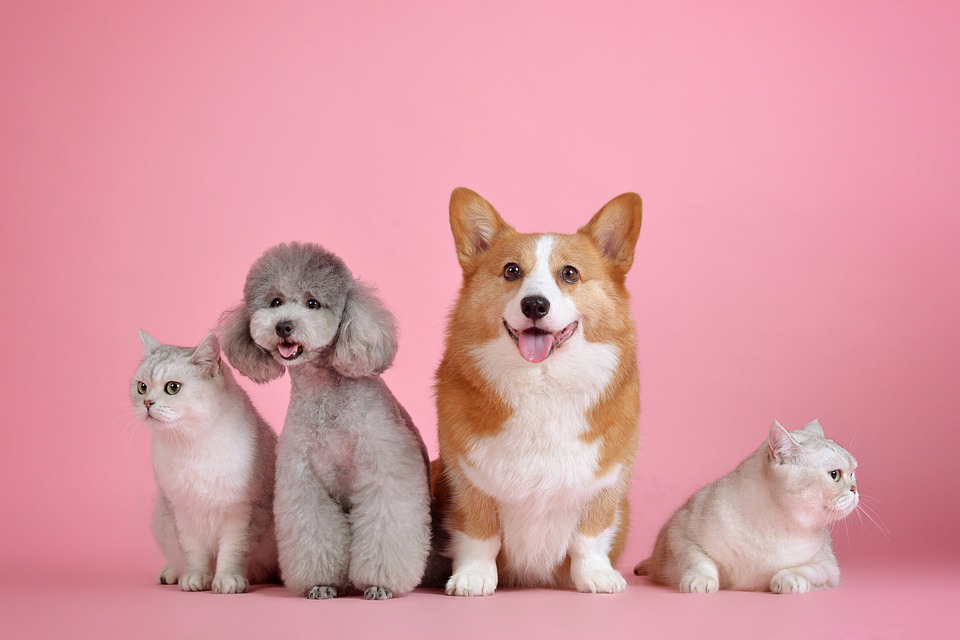

In [42]:
pic

- 타입(type) 확인

In [43]:
type(pic)

PIL.JpegImagePlugin.JpegImageFile

- PIL 이미지를 array형으로 형변환
  - `np.asarray()`

In [44]:
pic_arr = np.asarray(pic)

- 타입(type) 확인

In [45]:
type(pic_arr)

numpy.ndarray

In [46]:
pic_arr.shape

(640, 960, 3)

In [47]:
pic_arr

array([[[214, 123, 140],
        [214, 123, 140],
        [215, 124, 141],
        ...,
        [235, 145, 170],
        [235, 145, 170],
        [233, 145, 169]],

       [[214, 123, 140],
        [215, 124, 141],
        [215, 124, 141],
        ...,
        [235, 145, 170],
        [234, 144, 169],
        [233, 145, 169]],

       [[215, 124, 141],
        [215, 124, 141],
        [215, 124, 141],
        ...,
        [235, 145, 170],
        [234, 144, 169],
        [233, 145, 169]],

       ...,

       [[211, 133, 147],
        [211, 133, 147],
        [211, 133, 147],
        ...,
        [229, 151, 175],
        [229, 151, 175],
        [229, 151, 175]],

       [[211, 133, 147],
        [211, 133, 147],
        [211, 133, 147],
        ...,
        [229, 151, 175],
        [229, 151, 175],
        [230, 152, 176]],

       [[211, 133, 146],
        [211, 133, 146],
        [211, 133, 146],
        ...,
        [231, 153, 177],
        [231, 153, 177],
        [232, 154, 178]]

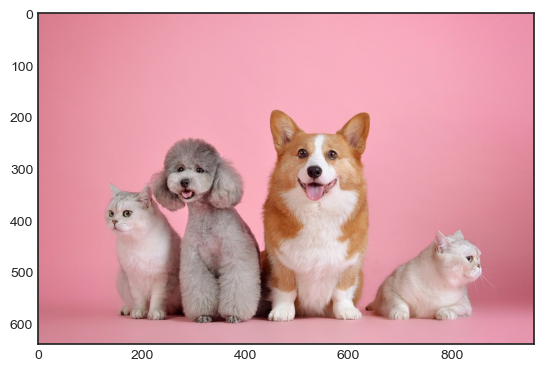

In [48]:
plt.imshow(pic_arr)
plt.show()

## 이미지 출력 2
- R, G, B 에 따라 이미지 확인

In [49]:
pic_copy = pic_arr.copy()

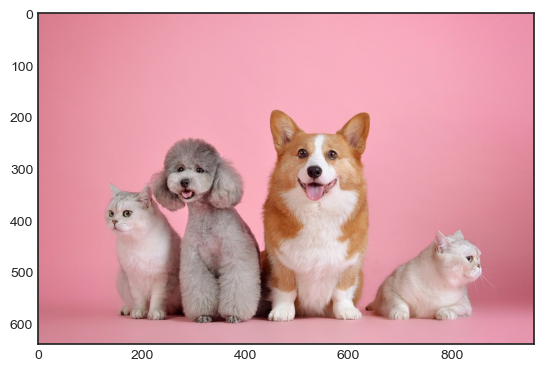

In [50]:
plt.imshow(pic_copy)
plt.show()

In [51]:
pic_copy.shape

(640, 960, 3)

- 채널 순서 (R G B : 0 1 2)
  - `R channel`

In [52]:
print(pic_copy[:, :, 0])
print(pic_copy[:, :, 0].shape)

[[214 214 215 ... 235 235 233]
 [214 215 215 ... 235 234 233]
 [215 215 215 ... 235 234 233]
 ...
 [211 211 211 ... 229 229 229]
 [211 211 211 ... 229 229 230]
 [211 211 211 ... 231 231 232]]
(640, 960)


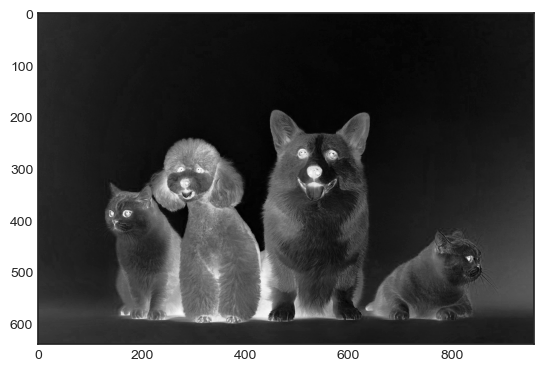

In [53]:
plt.imshow(pic_copy[:, :, 0])
plt.show()

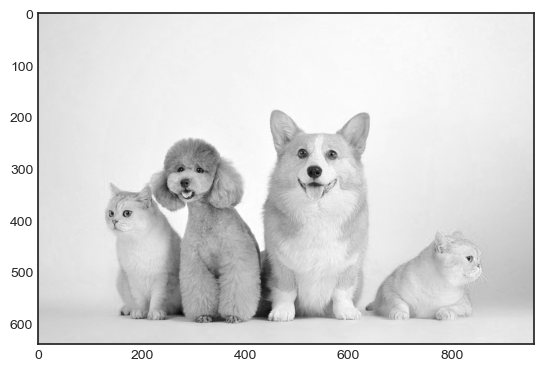

In [54]:
plt.imshow(pic_copy[:, :, 0], cmap='gray')
plt.show()

- 채널 순서 (R G B : 0 1 2)
  - `G channel`

In [55]:
print(pic_copy[:, :, 1])
print(pic_copy[:, :, 1].shape)

[[123 123 124 ... 145 145 145]
 [123 124 124 ... 145 144 145]
 [124 124 124 ... 145 144 145]
 ...
 [133 133 133 ... 151 151 151]
 [133 133 133 ... 151 151 152]
 [133 133 133 ... 153 153 154]]
(640, 960)


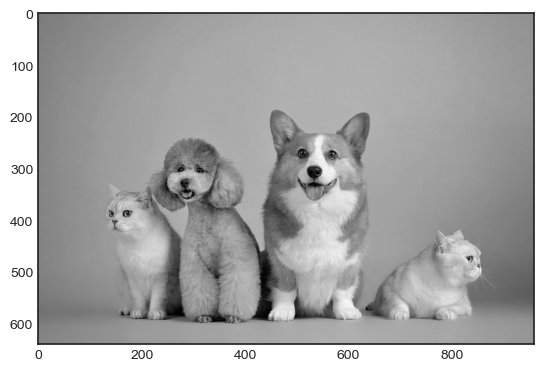

In [56]:
plt.imshow(pic_copy[:, :, 1], cmap='gray')
plt.show()

- 채널 순서 (R G B : 0 1 2)
  - `B channel`

In [57]:
print(pic_copy[:, :, 2])
print(pic_copy[:, :, 2].shape)

[[140 140 141 ... 170 170 169]
 [140 141 141 ... 170 169 169]
 [141 141 141 ... 170 169 169]
 ...
 [147 147 147 ... 175 175 175]
 [147 147 147 ... 175 175 176]
 [146 146 146 ... 177 177 178]]
(640, 960)


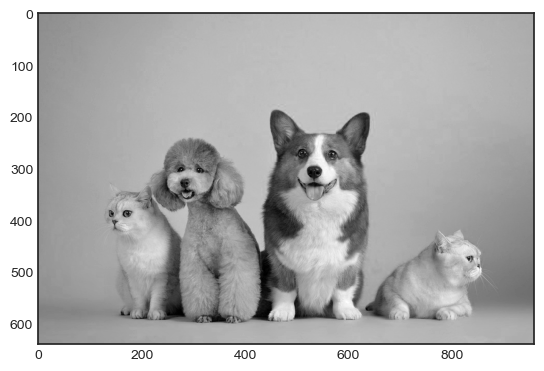

In [58]:
plt.imshow(pic_copy[:, :, 2], cmap='gray')
plt.show()

- `R channel` 분포 확인

In [59]:
pic_red = pic_arr.copy()
pic_red[:, :, 1:] = 0

In [60]:
pic_red

array([[[214,   0,   0],
        [214,   0,   0],
        [215,   0,   0],
        ...,
        [235,   0,   0],
        [235,   0,   0],
        [233,   0,   0]],

       [[214,   0,   0],
        [215,   0,   0],
        [215,   0,   0],
        ...,
        [235,   0,   0],
        [234,   0,   0],
        [233,   0,   0]],

       [[215,   0,   0],
        [215,   0,   0],
        [215,   0,   0],
        ...,
        [235,   0,   0],
        [234,   0,   0],
        [233,   0,   0]],

       ...,

       [[211,   0,   0],
        [211,   0,   0],
        [211,   0,   0],
        ...,
        [229,   0,   0],
        [229,   0,   0],
        [229,   0,   0]],

       [[211,   0,   0],
        [211,   0,   0],
        [211,   0,   0],
        ...,
        [229,   0,   0],
        [229,   0,   0],
        [230,   0,   0]],

       [[211,   0,   0],
        [211,   0,   0],
        [211,   0,   0],
        ...,
        [231,   0,   0],
        [231,   0,   0],
        [232,   0,   0]]

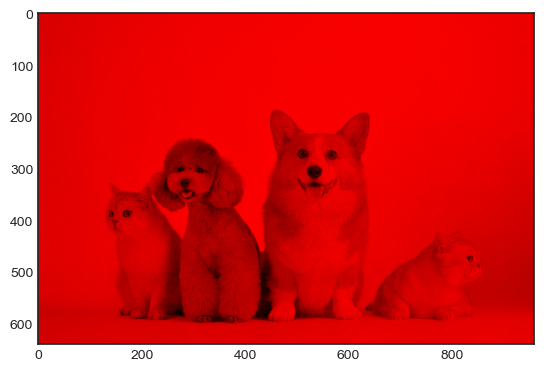

In [61]:
plt.imshow(pic_red)
plt.show()

- `G channel` 확인

In [62]:
pic_green = pic_arr.copy()
pic_green[:, :, (0, 2)] = 0

In [63]:
pic_green

array([[[  0, 123,   0],
        [  0, 123,   0],
        [  0, 124,   0],
        ...,
        [  0, 145,   0],
        [  0, 145,   0],
        [  0, 145,   0]],

       [[  0, 123,   0],
        [  0, 124,   0],
        [  0, 124,   0],
        ...,
        [  0, 145,   0],
        [  0, 144,   0],
        [  0, 145,   0]],

       [[  0, 124,   0],
        [  0, 124,   0],
        [  0, 124,   0],
        ...,
        [  0, 145,   0],
        [  0, 144,   0],
        [  0, 145,   0]],

       ...,

       [[  0, 133,   0],
        [  0, 133,   0],
        [  0, 133,   0],
        ...,
        [  0, 151,   0],
        [  0, 151,   0],
        [  0, 151,   0]],

       [[  0, 133,   0],
        [  0, 133,   0],
        [  0, 133,   0],
        ...,
        [  0, 151,   0],
        [  0, 151,   0],
        [  0, 152,   0]],

       [[  0, 133,   0],
        [  0, 133,   0],
        [  0, 133,   0],
        ...,
        [  0, 153,   0],
        [  0, 153,   0],
        [  0, 154,   0]]

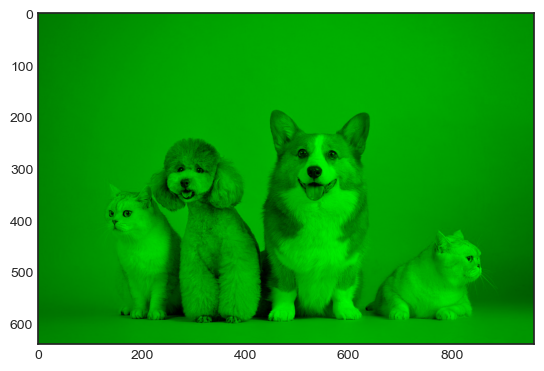

In [64]:
plt.imshow(pic_green)
plt.show()

- `B channel` 확인

In [65]:
pic_blue = pic_arr.copy()
pic_blue[:, :, :2] = 0

In [67]:
pic_blue

array([[[  0,   0, 140],
        [  0,   0, 140],
        [  0,   0, 141],
        ...,
        [  0,   0, 170],
        [  0,   0, 170],
        [  0,   0, 169]],

       [[  0,   0, 140],
        [  0,   0, 141],
        [  0,   0, 141],
        ...,
        [  0,   0, 170],
        [  0,   0, 169],
        [  0,   0, 169]],

       [[  0,   0, 141],
        [  0,   0, 141],
        [  0,   0, 141],
        ...,
        [  0,   0, 170],
        [  0,   0, 169],
        [  0,   0, 169]],

       ...,

       [[  0,   0, 147],
        [  0,   0, 147],
        [  0,   0, 147],
        ...,
        [  0,   0, 175],
        [  0,   0, 175],
        [  0,   0, 175]],

       [[  0,   0, 147],
        [  0,   0, 147],
        [  0,   0, 147],
        ...,
        [  0,   0, 175],
        [  0,   0, 175],
        [  0,   0, 176]],

       [[  0,   0, 146],
        [  0,   0, 146],
        [  0,   0, 146],
        ...,
        [  0,   0, 177],
        [  0,   0, 177],
        [  0,   0, 178]]

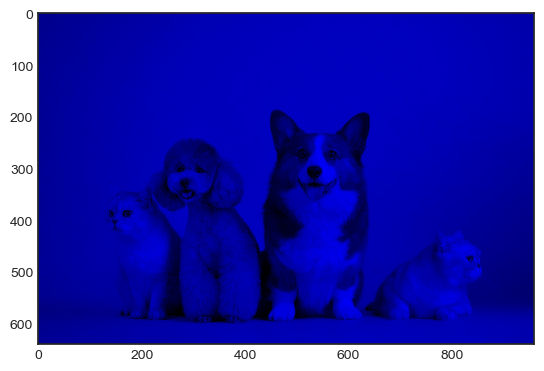

In [69]:
plt.imshow(pic_blue)
plt.show()

In [70]:
pic_arr

array([[[214, 123, 140],
        [214, 123, 140],
        [215, 124, 141],
        ...,
        [235, 145, 170],
        [235, 145, 170],
        [233, 145, 169]],

       [[214, 123, 140],
        [215, 124, 141],
        [215, 124, 141],
        ...,
        [235, 145, 170],
        [234, 144, 169],
        [233, 145, 169]],

       [[215, 124, 141],
        [215, 124, 141],
        [215, 124, 141],
        ...,
        [235, 145, 170],
        [234, 144, 169],
        [233, 145, 169]],

       ...,

       [[211, 133, 147],
        [211, 133, 147],
        [211, 133, 147],
        ...,
        [229, 151, 175],
        [229, 151, 175],
        [229, 151, 175]],

       [[211, 133, 147],
        [211, 133, 147],
        [211, 133, 147],
        ...,
        [229, 151, 175],
        [229, 151, 175],
        [230, 152, 176]],

       [[211, 133, 146],
        [211, 133, 146],
        [211, 133, 146],
        ...,
        [231, 153, 177],
        [231, 153, 177],
        [232, 154, 178]]

## 이미지 출력 3
- `OpenCV`

- `from google.colab.patches import cv2_imshow`
  - 원래는 `cv2.imshow`



In [77]:
# 로컬에서는 안됨

## OpenCV 의 채널 순서
- OpenCV를 통해 영상(이미지)을 다룰 때의 채널 순서는 B G R
- matplotlib은 R G B 순서

- `cv2.cvtColor()`
  
  - image arrary, 변경할 색공간을 인자로 넣어줌

  - 변경할 색공간은 여러 가지가 있음
    - `cv2.COLOR_BGR2RGB`

    - `cv2.COLOR_RGB2GRAY`

    - `cv2.COLOR_GRAY2RGB`

    - ...

In [83]:
img = cv2.cvtColor(pic_arr, cv2.COLOR_RGB2BGR)

- image, pic_arr 비교

  - 0 1 2 인덱스 중 0, 2가 바뀐 것을 알 수 있음

In [84]:
img[0][0]

array([140, 123, 214], dtype=uint8)

In [85]:
pic_arr[0][0]

array([214, 123, 140], dtype=uint8)

- (참고) array[ : ,  : ,  : : -1] 을 통해서도 인덱스 순서를 바꿀 수 있음

In [86]:
temp_arr = pic_arr[:, :, ::-1]

In [87]:
pic_arr[0][0]

array([214, 123, 140], dtype=uint8)

In [88]:
temp_arr[0][0]

array([140, 123, 214], dtype=uint8)

- 전체 배열 확인

In [89]:
temp_arr

array([[[140, 123, 214],
        [140, 123, 214],
        [141, 124, 215],
        ...,
        [170, 145, 235],
        [170, 145, 235],
        [169, 145, 233]],

       [[140, 123, 214],
        [141, 124, 215],
        [141, 124, 215],
        ...,
        [170, 145, 235],
        [169, 144, 234],
        [169, 145, 233]],

       [[141, 124, 215],
        [141, 124, 215],
        [141, 124, 215],
        ...,
        [170, 145, 235],
        [169, 144, 234],
        [169, 145, 233]],

       ...,

       [[147, 133, 211],
        [147, 133, 211],
        [147, 133, 211],
        ...,
        [175, 151, 229],
        [175, 151, 229],
        [175, 151, 229]],

       [[147, 133, 211],
        [147, 133, 211],
        [147, 133, 211],
        ...,
        [175, 151, 229],
        [175, 151, 229],
        [176, 152, 230]],

       [[146, 133, 211],
        [146, 133, 211],
        [146, 133, 211],
        ...,
        [177, 153, 231],
        [177, 153, 231],
        [178, 154, 232]]

In [90]:
pic_arr

array([[[214, 123, 140],
        [214, 123, 140],
        [215, 124, 141],
        ...,
        [235, 145, 170],
        [235, 145, 170],
        [233, 145, 169]],

       [[214, 123, 140],
        [215, 124, 141],
        [215, 124, 141],
        ...,
        [235, 145, 170],
        [234, 144, 169],
        [233, 145, 169]],

       [[215, 124, 141],
        [215, 124, 141],
        [215, 124, 141],
        ...,
        [235, 145, 170],
        [234, 144, 169],
        [233, 145, 169]],

       ...,

       [[211, 133, 147],
        [211, 133, 147],
        [211, 133, 147],
        ...,
        [229, 151, 175],
        [229, 151, 175],
        [229, 151, 175]],

       [[211, 133, 147],
        [211, 133, 147],
        [211, 133, 147],
        ...,
        [229, 151, 175],
        [229, 151, 175],
        [230, 152, 176]],

       [[211, 133, 146],
        [211, 133, 146],
        [211, 133, 146],
        ...,
        [231, 153, 177],
        [231, 153, 177],
        [232, 154, 178]]

## 이미지 읽기 2
- `cv2.imread()`

  - path, 이미지 파일의 flag값을 인자로 넣어줌

    - `cv2.IMREAD_COLOR`  
      이미지 파일을 Color로 읽어들이고, 투명한 부분은 무시되며, Default 값
    
    - `cv2.IMREAD_GRAYSCALE`  
      이미지를 Grayscale로 읽음. 실제 이미지 처리시 중간단계로 많이 사용
    
    - `cv2.IMREAD_UNCHANGED`  
      이미지 파일을 alpha channel (투명도)까지 포함하여 읽어 들임

- **(주의)**
  - `cv2.imread()`는 잘못된 경로로 읽어도 `NoneType`으로 들어갈 뿐, <u>오류를 발생하지 않음</u>

- 이미지 다운로드 후 colab에 업로드
  
  - https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/220px-Lenna.png
  
  <br>
  
  <img src="https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png" width="300">


- `grayscale`로 읽기

## 이미지 저장
- `cv2.imwrite()`
  - 경로, 이미지 배열을 인자로 받음

- 이미지 저장을 하면 True반환

- 없는 이미지를 읽어도 type이 NoneType으로 들어갈 뿐 에러를 발생하지 않음

# 컬러 매핑(Color Mapping)

- 주로 그레이 스케일(Grayscale), 트루 컬러(True Color, RGB)이미지를 많이 활용

- 다양한 색 공간(ex, `HSV`, `YCrCB` 등)이 존재하고 이들을 변환할 수 있음
  
- 컬러 영상 처리에서 `HSV`와 `HSL`은 같은 색 공간을 이용하여 색상 구분에 용이하고, `YCrCb`와 `YUV`는 휘도 성분 구분에 용이

- `cv2.cvtColor()` 활용

## 색 공간의 종류 (참고)

- RGB
  - 컬러 표현을 빛의 3원색인 (Red, Green, Blue)으로 서로 다른 비율을 통해 색 표현

- CMYK
  - Cyan, Magenta, Yellow, Black를 기본으로 하여 주로 컬러 프린터나 인쇄시에 사용

  - 각 성분들의 감산에 의해 컬러 구현

- YUV

  - Y축은 밝기 성분을 U,V 두축을 이용하여 색상을 표현
  
  - U축은 파란색에서 밝기 성분을 뺀 값, V축은 빨간색에서 밝기 성분을 뺀 값
    
  - 아날로그 컬러신호 변환에 주로 사용.  (U = B - Y) , (V = R - Y)

- YCbCr
  
  - Digital TV에서 사용하는 색공간
  
  - YPbPr이라는 아날로그 신호의 색공간을 디지털화한 것
  
  - YPbPr은 아날로그 컴포넌트 비디오에서 사용


## RGB Color Space

- 빛의 삼원색 조합으로 색을 표현
  - `R`(빨간색), `G`(초록색), `B`(파란색)

- 디지털 컬러 영상을 획득할 때 사용

- 보편적으로 사용되고 있지만 '컬러 영상 처리'에서는 주로 사용되지 않음

  <br>
  
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/RGB_Cube_Show_lowgamma_cutout_b.png/600px-RGB_Cube_Show_lowgamma_cutout_b.png">

  <sub>[이미지 출처] https://en.wikipedia.org/wiki/RGB_color_space</sub>

- 이미지  

  - 이미지 사용 (다른 이미지 사용 가능)

  <img src="https://cdn.pixabay.com/photo/2017/09/25/13/12/dog-2785074_960_720.jpg" width="300">

  <sub>[이미지 출처] https://pixabay.com/ko/photos/%EA%B0%95%EC%95%84%EC%A7%80-%EA%B0%9C-%EC%95%A0%EC%99%84-%EB%8F%99%EB%AC%BC-%EB%8F%99%EB%AC%BC-1903313/</sub>

- OpenCV와 matplotlib의 색공간 순서가 다르기 때문에 생기는 문제

  - `matploblib` : R G B

  - `OpenCV` : B G R

## HSV Color Space

- 색상(Hue), 채도(Saturation), 명도(Value)로 색을 표현

- 색상은 흔히 빨간색, 노란색 등과 같은 색의 종류

- 채도는 색의 순도  

  예들 들어, 파란색에서
  
  - 채도가 높으면 맑고 선한 파란색

  - 채도가 낮으면 탁한 파란색

- 명도는 빛의 세기

  - 명도가 높으면 밝고, 낮으면 어둡게 느껴진다.

- OpenCV에서 `BGR2HSV` 색 공간 변환할 경우,  
  - `H` : 0 ~ 179 사이의 정수로 표현
    - 색상 값은 0° ~ 360° 로 표현하지만  
      uchar 자료형은 256이상의 정수를 표현할 수 없기 때문에 OpenCV에서는 각도를 2로 나눈 값을 H로 저장

  - `S` : 0 ~ 255 사이의 정수로 표현

  - `V` : 0 ~ 255 사이의 정수로 표현

  <br>

  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/HSV_cone.jpg/400px-HSV_cone.jpg">

  <sub>[이미지 출처] https://ko.wikipedia.org/wiki/HSV_%EC%83%89_%EA%B3%B5%EA%B0%84</sub>

## HSL Color Space

- 색상(Hue), 채도(Saturation), 밝기(Lightness)로 색을 표현하는 방식

- HSV와 동일하지만 **밝기** 요소의 차이

- HSV와 더불어 사람이 실제로 color를 인지하는 방식과 유사

  <br>

  <img src="https://rgbtohex.page/imgs/hsl-cylinder.png">

  <sub>[이미지 출처] https://rgbtohex.page/hsl</sub>

## YCrCb Color Space

- Y 성분은 밝기 또는 휘도(luminance), Cr, Cb 성분은 색상 또는 색차(chrominance)를 나타냄

- Cr, Cb는 오직 색상 정보만 가지고 있음. 밝기 정보 X

- 영상을 GrayScale 정보와 색상 정보로 분리하여 처리할 때 유용

- `Y`, `Cr`, `Cb`  : 0 ~ 255 사이의 정수로 표현

  <br>

  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/YCbCr-CbCr_Scaled_Y50.png/600px-YCbCr-CbCr_Scaled_Y50.png" width="300">
  <img src="https://upload.wikimedia.org/wikipedia/commons/b/b8/YCbCr.GIF">

  <sub>[이미지 출처] https://en.wikipedia.org/wiki/YCbCr</sub>

## GrayScale Color Space

- 영상의 밝기 정보를 256단계 (0 ~ 255) 로 구분하여 표현

- 가장 밝은 흰색 : 255  
  가장 어두운 검은색 : 0

  <img src="https://miro.medium.com/max/1400/1*euc4RxnNo78LFEGrb-QZ7w.jpeg">

  <sub>[이미지 출처] https://medium.com/@himnickson/converting-rgb-image-to-the-grayscale-image-in-java-9e1edc5bd6e7</sub>

# 도형 그리기

- 다양한 도형을 그릴 수 있음

- 도형을 그리는 좌표가 해당 범위를 넘어가면 이미지에 표현되지 않음

## Line 그리기

- `cv.line()`

  - `Parameters`
    - `img` : 그림을 그릴 이미지 파일

    - `start` : 시작 좌표

    - `end` : 종료 좌표

    - `color` : BGR형태의 Color (ex; (255, 0, 0) -> Blue)

    - `thickness` (int) : 선의 두께. pixel

## rectangle 그리기

- `cv2.rectangle()`

  - `Parameters`
    - `img` : 그림을 그릴 이미지

    - `start` : 시작 좌표

    - `end` : 종료 좌표

    - `color` : BGR형태의 Color(ex; (255, 0, 0) -> Blue)

    - `thickness` (int) : 선의 두께. pixel

## Circle 그리기

- `cv2.circle()`

  - `Parameters`
    - `img` : 그림을 그릴 이미지

    - `center` : 원의 중심 좌표(x, y)

    - `radian` : 반지름

    - `color` : BGR형태의 Color

    - `thickness` : 선의 두께, -1 이면 원 안쪽을 채움

## ellipse(타원) 그리기

- `cv2.ellipse()`

  - `Parameters`  
    
    - `img` : image

    - `center` : 타원의 중심

    - `axes` : 중심에서 가장 큰 거리와 작은 거리

    - `angle` : 타원의 기울기 각

    - `startAngle` : 타원의 시작 각도

    - `endAngle` : 타원이 끝나는 각도

    - `color` : 타원의 색

    - `thickness` : 선 두께. -1이면 안쪽을 채움


## Polygon 그리기

- `cv2.polylines()`
  
  - `Parameters`
    
    - `img` : image

    - `pts` (array) : 연결할 꼭지점 좌표

    - `isClosed` : 닫힌 도형 여부

    - `color` : Color

    - `thickness` : 선 두께

- 이미지에 표현하기 위해 점 좌표를 3차원 행렬로 변환.
  - 변환이전과 이후의 행렬 갯수는 동일해야함.

  -  -1은 원본에 해당하는 값을 그대로 유지.

## Text 추가하기

- `cv2.putText()`

  - `Parameters`
    - `img` : image

    - `text` : 표시할 문자열

    - `org` : 문자열이 표시될 위치. 문자열의 **bottom-left corner 점**

    - `font` : font type. CV2.FONT_XXX

    - `fontSacle` : Font Size

    - `color` : fond color